### **Pregunta1:A cual tipo de vino pertenece?**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**leer datos con nuestro vino**

In [5]:
df = pd.read_csv('wines.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


**Estadisticas básicas**

In [6]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,13.006369,2.332849,2.366760,19.472626,99.888268,2.297877,2.034972,0.361508,1.594860,5.060950,0.957911,2.618436,748.653631
std,0.813191,1.114987,0.273592,3.343530,14.376902,0.625186,0.998967,0.124189,0.573204,2.312081,0.228012,0.713730,314.903646
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.365000,1.605000,2.210000,17.150000,88.000000,1.745000,1.210000,0.270000,1.250000,3.230000,0.785000,1.945000,501.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.700000,0.970000,2.780000,675.000000
75%,13.685000,3.065000,2.555000,21.500000,107.500000,2.800000,2.885000,0.435000,1.955000,6.200000,1.120000,3.175000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


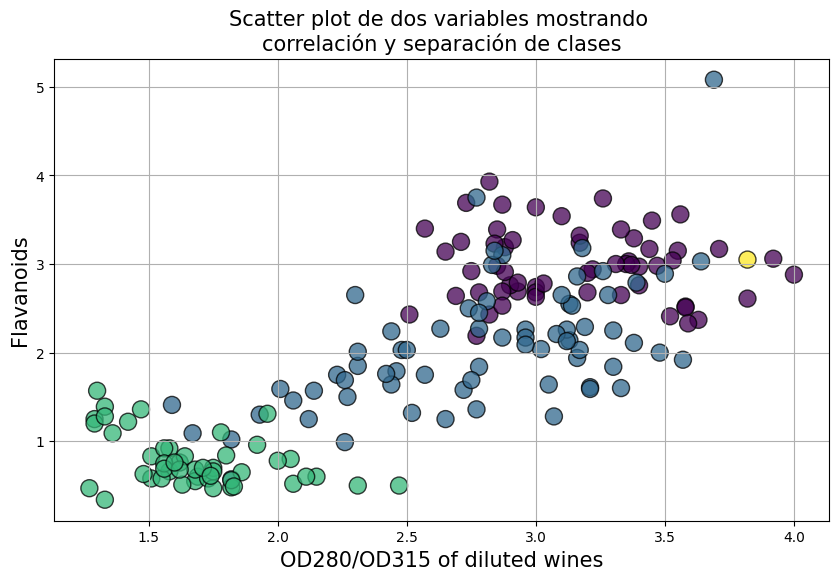

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

**Se utiliza matrix de covarianza para saber los 3 mejores componentes**

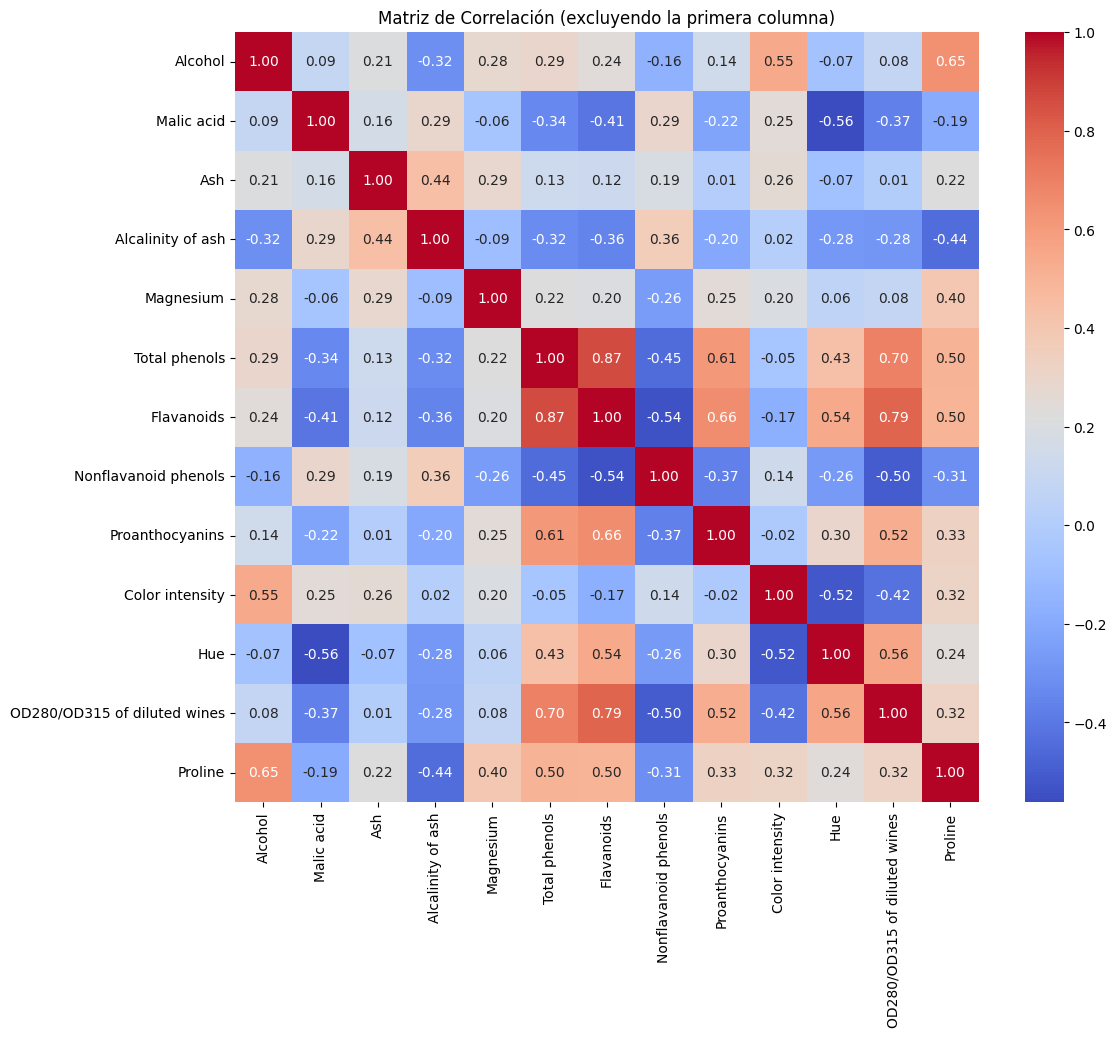

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()

**Análisis de componentes principales**

In [9]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

**Se toman los 3 mejores componentes**

In [10]:
nuevo_df = df[['OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols']]
pca = PCA(n_componentes=3)
pca_proyeccion = pca.run(nuevo_df)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2]


In [11]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1,2
0,2.097919,0.800075,0.101507
1,1.372268,0.413501,0.021729
2,1.618906,-0.069818,-0.294601
3,2.959969,-0.778977,0.573132
4,1.101365,-0.237949,0.055284
5,1.893527,-0.891295,-0.087428
6,1.230382,0.797462,0.132793
7,1.316965,0.706288,0.232894
8,1.212615,-0.379868,-0.199400
9,2.028966,0.203332,0.071213


**Definimos Kmeans**

In [12]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids
    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

**Uso del Kmeans con los 3 componentes**

In [13]:
np.random.seed(50)
points = dfx_trans.values
print(points.shape)
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(kmeans.centroids)

(179, 3)
[[ 0.17342286  0.37222904 -0.01375567]
 [-1.90303652 -0.13974172  0.01513943]
 [ 1.66259076 -0.14082828 -0.00417547]]


**Bibujo de los 3 componentes**

In [14]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('Componente  1')
    ax1.set_ylabel('Componente  2')
    ax1.set_zlabel('Componente  3')

    # Vino nuevo
    vino_nuevo = points[-1]  # Toma la última fila del Dataset
    ax1.scatter(vino_nuevo[0], vino_nuevo[1], vino_nuevo[2],
                c='gray', edgecolors='black', s=135, label='Vino nuevo')

    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('Componente  1')
    ax2.set_ylabel('Componente  2')
    ax2.set_zlabel('Componente  3')
    ax2.legend()

    # Vino nuevo
    vino_nuevo = points[-1]  # Toma la última fila del Dataset
    ax2.scatter(vino_nuevo[0], vino_nuevo[1], vino_nuevo[2],
                c='gray', edgecolors='black', s=135, label='Vino nuevo')

    ax2.legend()

    plt.tight_layout()
    plt.show()

**Resultados del Kmeans**

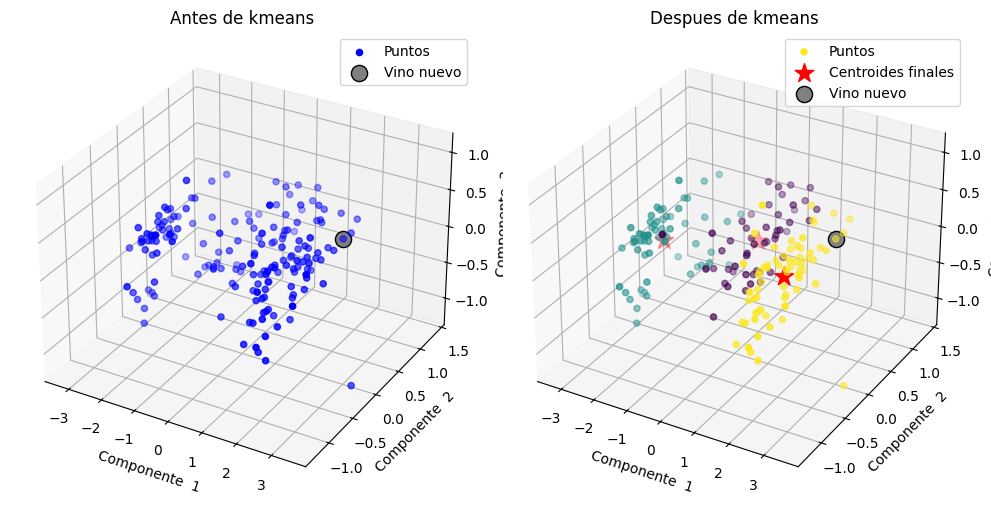

In [15]:
dibujar3D(points, kmeans.centroids, labels)

**Respuesta:**

In [16]:
# Encontrar el cluster al que pertenece el nuevo vino
nuevo_vino_cluster = labels[-1]  # El último punto es el nuevo vino
print(f"El nuevo vino pertenece al cluster: {nuevo_vino_cluster}")


El nuevo vino pertenece al cluster: 2


##**Pregunta2: Cambian los resultados si utiliza los 2 mejores componentes?**

**Tomamos los 2 mejores componentes**

In [17]:
nuevo_df_2C = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca_2C = PCA(n_componentes=2)
pca_proyeccion_2C = pca_2C.run(nuevo_df_2C)

dfx_trans_2C = pd.DataFrame(data=pca_proyeccion_2C)
dfx_trans_2C.head(10)

Caracteristicas seleccionadas para el vector de caracteristicas
[1 0]


,0,1
0,-2.020692,-0.565513
1,-1.291125,-0.261841
2,-1.403336,0.307379
3,-1.858972,0.206655
4,-0.774493,0.155416
5,-1.191890,0.731772
6,-1.299597,-0.611029
7,-1.292499,-0.618127
8,-0.900862,0.440745
9,-1.716981,-0.134035


**Kmeans de los 2 componentes**

In [18]:
np.random.seed(50)
points_2C = dfx_trans_2C.values
print(points_2C.shape)
kmean_2C = KMeans(k=3)
labels_2C = kmean_2C.run(points_2C)
print(kmean_2C.centroids)

(179, 2)
[[-0.18599352 -0.22827029]
 [ 1.72003586  0.0490523 ]
 [-1.30565821  0.13079742]]


**Bibujo de los 2 componentes**

In [19]:
def dibujar2D(points, centroids, labels):
    vino_nuevo = points[-1]  # Tomamos vino nuevo (última fila del dataset)

    plt.figure(figsize=(10, 5))

    # Primera gráfica: antes de aplicar K-Means
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.scatter(vino_nuevo[0], vino_nuevo[1], c='gray', edgecolors='black', s=200, label='Vino nuevo')  # Resaltar el vino nuevo
    plt.title('Antes de kmeans')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()

    # Segunda gráfica: después de aplicar K-Means
    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.scatter(vino_nuevo[0], vino_nuevo[1], c='gray', edgecolors='black', s=200, label='Vino nuevo')  # Resaltar el vino nuevo
    plt.title('Despues de kmeans')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()

    plt.tight_layout()
    plt.show()


    plt.tight_layout()
    plt.show()

**Resultados del Kmeans**

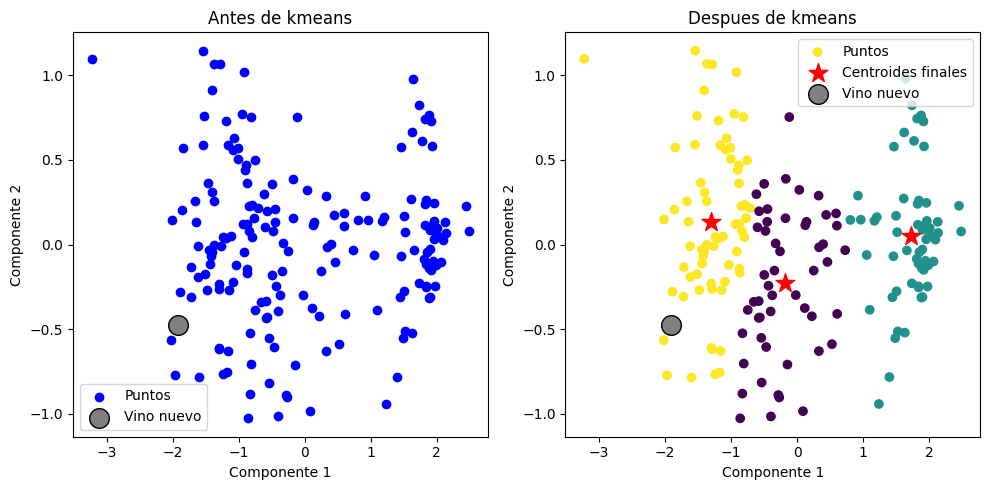

<Figure size 640x480 with 0 Axes>

In [20]:
dibujar2D(points_2C, kmean_2C.centroids, labels_2C)

In [21]:
nuevo_vino_cluster_2C = labels_2C[-1]  # El último punto es el nuevo vino
print(f"El nuevo vino pertenece al cluster (usando 2 componentes): {nuevo_vino_cluster_2C}")

# Comparación de resultados:
print(f"Cluster con 3 componentes: {nuevo_vino_cluster}")
print(f"Cluster con 2 componentes: {nuevo_vino_cluster_2C}")

if nuevo_vino_cluster == nuevo_vino_cluster_2C:
    print("Los resultados NO cambian al usar 2 componentes en lugar de 3.")
else:
    print("Los resultados cambian al usar 2 componentes en lugar de 3.")


El nuevo vino pertenece al cluster (usando 2 componentes): 2
Cluster con 3 componentes: 2
Cluster con 2 componentes: 2
Los resultados NO cambian al usar 2 componentes en lugar de 3.


**Respuesta: Al parecer los 2 componentes con 3 clusters dan como resultado que el vino no cambie su tipo**

##**Pregunta 3: Cambian los resultados si utiliza los 5 mejores componentes?**

**Tomamos los 5 mejores componentes**

In [22]:
nuevo_df_5C = df[['OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols', 'Proline', 'Proanthocyanins']]
pca_5C = PCA(n_componentes=5)
pca_proyeccion_5C = pca_5C.run(nuevo_df_5C)

dfx_trans_5C = pd.DataFrame(data=pca_proyeccion_5C)
dfx_trans_5C.head(10)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2 3 4]


,0,1,2,3,4
0,-2.597887,-0.077154,-0.079764,-0.866261,-0.183758
1,-1.241083,0.555440,-1.163669,-0.274944,0.019287
2,-2.718943,0.400335,1.179695,-0.443361,0.146341
3,-3.716068,1.317062,-0.197507,0.505446,-0.574797
4,-1.086585,-0.350076,-0.083096,0.345246,-0.019695
5,-2.635459,1.622839,0.029645,0.470446,0.070430
6,-1.874950,0.915690,-0.152797,-1.075020,-0.245621
7,-1.423179,1.217181,-1.264092,-0.718516,-0.239433
8,-1.628941,0.496842,0.184391,0.179794,0.180140
9,-2.210998,0.198886,-0.544077,-0.157341,-0.064019


**Kmeans de los 5 componentes**

In [23]:
np.random.seed(50)
points_5C = dfx_trans_5C.values
print(points_5C.shape)
kmean_5C = KMeans(k=3)
labels_5C = kmean_5C.run(points_5C)
print(kmean_5C.centroids)

(179, 5)
[[ 0.11553541 -0.89101665 -0.03763489 -0.12379775  0.00425587]
 [ 2.16849151  0.34056548  0.0992902   0.11477061 -0.02060307]
 [-1.91025385  0.34939241 -0.05680539 -0.00830827  0.01432553]]


**Bibujo de los 5 componentes**

In [24]:
def dibujar3D_5C (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

        # Vino nuevo
    vino_nuevo = points[-1]  # Se toma la última fila del Dataset
    ax1.scatter(vino_nuevo[0], vino_nuevo[1], vino_nuevo[2],
                c='gray', edgecolors='black', s=135, label='Vino nuevo')

    ax1.legend()



    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

        # Vino nuevo
    vino_nuevo = points[-1]  # Se toma la última fila del Dataset
    ax2.scatter(vino_nuevo[0], vino_nuevo[1], vino_nuevo[2],
                c='gray', edgecolors='black', s=135, label='Vino nuevo')

    ax2.legend()

    plt.tight_layout()
    plt.show()


**Resultados del Kmeans**

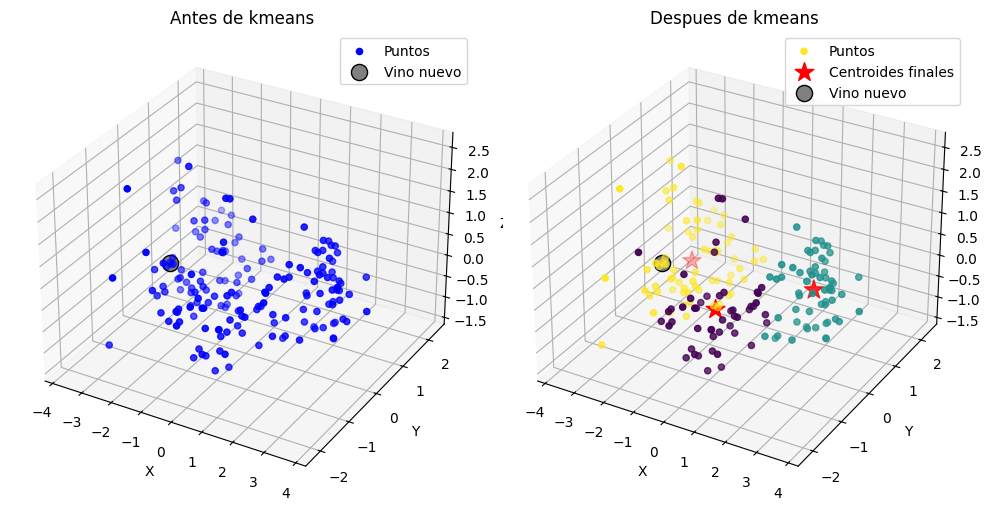

In [25]:
dibujar3D_5C(points_5C, kmean_5C.centroids, labels_5C)

In [26]:
nuevo_vino_cluster_5C = labels_5C[-1]  # El último punto es el nuevo vino
print(f"El nuevo vino pertenece al cluster (usando 5 componentes): {nuevo_vino_cluster_5C}")

# Comparación de resultados:
print(f"Cluster con 3 componentes: {nuevo_vino_cluster}")
print(f"Cluster con 2 componentes: {nuevo_vino_cluster_2C}")
print(f"Cluster con 5 componentes: {nuevo_vino_cluster_5C}")

if nuevo_vino_cluster == nuevo_vino_cluster_2C == nuevo_vino_cluster_5C:
    print("Los resultados NO cambian al usar 2 o 5 componentes en lugar de 3.")
else:
    print("Los resultados cambian al usar 2 o 5 componentes en lugar de 3.")


El nuevo vino pertenece al cluster (usando 5 componentes): 2
Cluster con 3 componentes: 2
Cluster con 2 componentes: 2
Cluster con 5 componentes: 2
Los resultados NO cambian al usar 2 o 5 componentes en lugar de 3.


**Respuesta: Por lo visto en el kmeans los resultados varian bastantes con respecto a los anteriores, pero el vino sigue preteneciendo al tipo 2**

##**Pregunta4: Cambian los resultados si utiliza los 3 peores componentes?**

**Tomamos los 3 peores componentes**

In [27]:
nuevo_df_3Pc = df[['Ash', 'Magnesium', 'Color intensity']]
pca_3Pc = PCA(n_componentes=3)
pca_proyeccion_3Pc = pca_3Pc.run(nuevo_df_3Pc)

dfx_trans_3Pc = pd.DataFrame(data=pca_proyeccion_3Pc)
dfx_trans_3Pc.head(10)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 2 1]


,0,1,2
0,1.358759,-1.015503,-0.903047
1,-0.665800,-0.144312,-0.560344
2,0.871318,0.040234,0.743418
3,1.471367,0.292257,-0.485708
4,1.673642,-1.236217,0.878791
5,1.070043,0.003863,-0.445485
6,0.076765,0.200689,0.356648
7,1.383404,-1.021241,-0.081296
8,-0.523207,0.249663,-0.477768
9,0.220627,0.843359,-0.510003


**Kmeans de los 3 componentes**

In [28]:
np.random.seed(50)
points_3Pc = dfx_trans_3Pc.values
print(points_3Pc.shape)
kmean_3Pc = KMeans(k=3)
labels_3Pc = kmean_3Pc.run(points_3Pc)
print(kmean_3Pc.centroids)

(179, 3)
[[-1.34251461 -0.12765993 -0.5338532 ]
 [ 1.14051822  0.17495605 -0.22001811]
 [-0.39975318 -0.12003418  0.67174557]]


**Bibujo de los 3 componentes**

In [29]:
def dibujar3D_3Pc(points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')


    # Vino nuevo
    vino_nuevo = points[-1]  # Se toma la última fila del Dataset
    ax1.scatter(vino_nuevo[0], vino_nuevo[1], vino_nuevo[2],
                c='gray', edgecolors='black', s=135, label='Vino nuevo')

    ax1.legend()



    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    # Vino nuevo
    mi_vino = points[-1]
    ax2.scatter(mi_vino[0], mi_vino[1], mi_vino[2],
                c='gray', edgecolors='black', s=135, label='Vino nuevo')

    ax2.legend()

    plt.tight_layout()
    plt.show()

**Resultados del Kmeans**

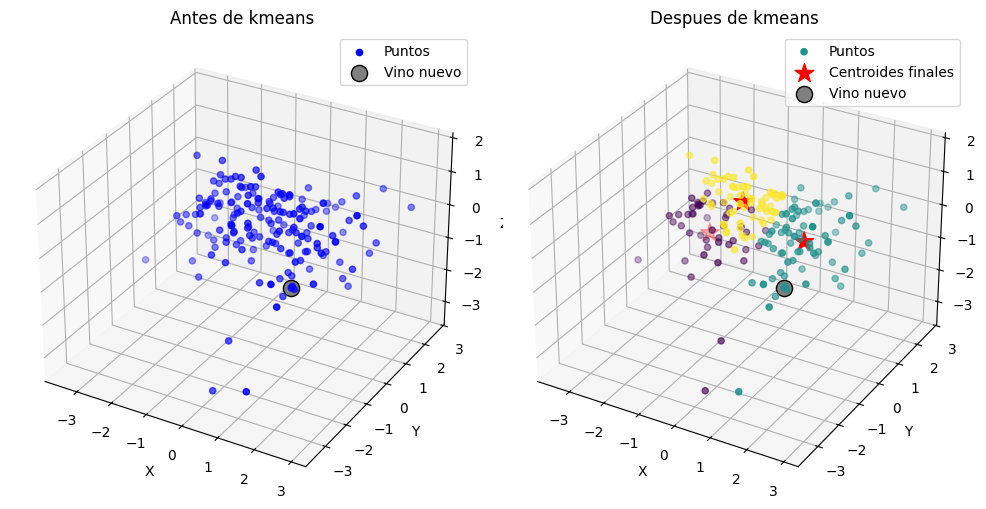

In [30]:
dibujar3D_3Pc(points_3Pc, kmean_3Pc.centroids, labels_3Pc)

In [31]:
nuevo_vino_cluster_3Pc = labels_3Pc[-1]  # El último punto es el nuevo vino
print(f"El nuevo vino pertenece al cluster (usando 3 peores componentes): {nuevo_vino_cluster_3Pc}")

# Comparación de resultados:
print(f"Cluster con 3 componentes: {nuevo_vino_cluster}")
print(f"Cluster con 2 componentes: {nuevo_vino_cluster_2C}")
print(f"Cluster con 3 peores componentes: {nuevo_vino_cluster_3Pc}")

if nuevo_vino_cluster == nuevo_vino_cluster_2C == nuevo_vino_cluster_3Pc:
    print("Los resultados NO cambian al usar los 3 peores componentes en lugar de 3 mejores.")
else:
    print("Los resultados cambian al usar los 3 peores componentes en lugar de 3 mejores.")


El nuevo vino pertenece al cluster (usando 3 peores componentes): 1
Cluster con 3 componentes: 2
Cluster con 2 componentes: 2
Cluster con 3 peores componentes: 1
Los resultados cambian al usar los 3 peores componentes en lugar de 3 mejores.


**respuesta: La grafica es completamente diferente a la de la primera pregunta pero aca el vino si cambia su tipo al 1**